In [1]:
import numpy as np
import pandas as pd
from evaluators.monte_carlo import MonteCarlo
from models.jump_vasicek import JumpVasicek

In [2]:
paper_params = {
    "a": 0.5,
    "b": 0.05,
    "theta": 0.025,
    "sigma": 0.08,
    "lambda": -0.5,
    "gamma": 0.01,
    "h": 10,
    "mu": 0
}

r = 0.05
t = 0
T = 20
m = 365*(T-t)
n = 1000
delta_t = (T-t)/m

In [3]:
jump_vasicek = JumpVasicek(paper_params)
mc_vasicek = MonteCarlo(jump_vasicek, r, t, T, m, n)

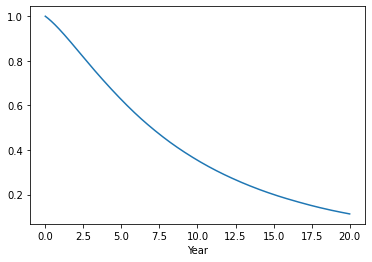

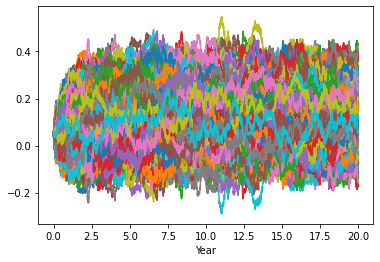

In [4]:
prices_anti, mean_prices_anti, sd_prices_anti, i_rates_anti = mc_vasicek.plot_price_curve(type_="antithetic")

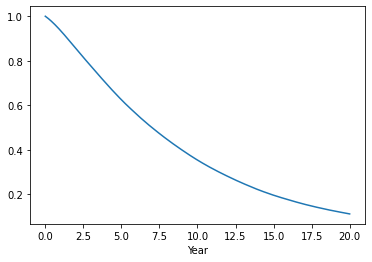

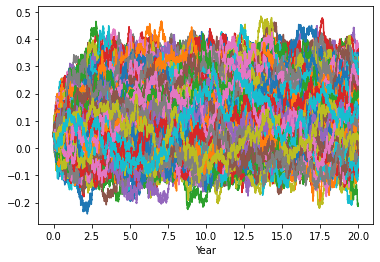

In [5]:
prices_class, mean_prices_class, sd_prices_class, i_rates_class = mc_vasicek.plot_price_curve(type_="classical")

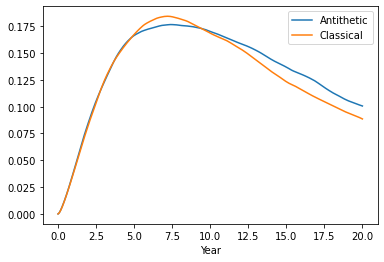

In [6]:
sd_df = pd.concat([sd_prices_anti, sd_prices_class], axis=1)
sd_df.columns = ["Antithetic", "Classical"]
sd_df.plot()